In [1]:
import os
import copy
import pickle
import numpy as np
import glob

# matplotlib
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

# astropy
from astropy.io import fits
from astropy.nddata import Cutout2D
from astropy.utils.data import download_file
from astropy.coordinates import SkyCoord, Angle
from astropy import wcs
from astropy.table import Table,vstack
import astropy.units as u
import matplotlib.pyplot as plt 

import sncosmo

import sys
# so can find module one dir back; don't need to explicitly put .py into each subfolder 
sys.path.append("../..")
from candels_galaxy_surveys import galaxy_catalog,galaxy_survey
import update_galaxy_survey

# so can find script for host ellipses 
sys.path.append("../../visualize_hosts/")
from sn_cutout import ellipse

candels = pickle.load(open('delz_candels.pkl','rb'))

In [3]:
UDS10RobC = candels[-24]

delz = UDS10RobC[0]
nearby = UDS10RobC[1][1]
host = UDS10RobC[1][2]
lc = UDS10RobC[1][3]



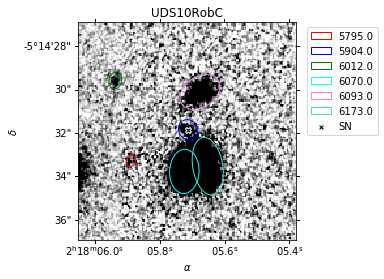

In [4]:
nick = UDS10RobC[1][0]['name'] 
# the SN skycoord location
sn_loc = SkyCoord(UDS10RobC[1][0]['RA'],UDS10RobC[1][0]['DEC'],unit = (u.hourangle,u.deg))


# updating the surveys
update_near = update_galaxy_survey.update_survey(nearby)
update_host = update_galaxy_survey.update_survey(host[0])

# renaming for clarity
nearby = update_near
host = [update_host,host[1],host[2]]

# getting list of the ids, elliptical parameters for each nearby for this SN
ids = [i for i in nearby.mass[nearby.ids]]
nearby_coords = [i for i in nearby.gal_skycoords()]
a_ellipse = [np.float(i) for i in nearby.photom[nearby.a_ellip]]
b_ellipse = [np.float(i) for i in nearby.photom[nearby.b_ellip]]
theta_ellipse = [np.float(i) for i in nearby.photom[nearby.theta_ellip]]
gal_sources = [nearby.source]*len(nearby.photom)

# 5 element list, each element another x element list for a given SN with the x candidate parameters.
possible_hosts = [nearby_coords, a_ellipse, b_ellipse, theta_ellipse,ids,gal_sources]

# the ellipse 2nd argument wants a list with the x candidate parameters all together 
# ie not [[all coords], [all a], [all b], [all theta]] rather [[coords,a,b,theta],...]
possible_hosts = list(zip(possible_hosts[0],possible_hosts[1],possible_hosts[2],possible_hosts[3],possible_hosts[4],possible_hosts[5]))

ellipse(nick.lower()+'10x10.fits',possible_hosts,sn_loc,title=nick,save=False,show=True,diverging=False,logscale=False,val_min = -.009,val_max = .019 )


In [8]:
from astropy.table import hstack
print(hstack([nearby.mass[nearby.ids,nearby.redshift_names],nearby.mass[nearby.zspec,nearby.zphot,nearby.dz_l95,nearby.dz_u95]]))

 Seq   zbest zspec zphot zphot_l95 zphot_u95
------ ----- ----- ----- --------- ---------
5795.0 0.567 -99.0 0.567      0.39      3.94
5904.0 0.084 -99.0 0.084      0.01      7.71
6012.0 2.197 -99.0 2.197      1.92      2.53
6070.0 1.112 -99.0 1.112      1.04      1.22
6093.0 1.594 -99.0 1.594      1.49      1.71
6173.0 0.643 0.643 0.597      0.51      0.69


In [6]:
UDS10RobC[1][0]

name,nickname,col2,decliner,REPROC,RA,DEC,Host RA,Host DEC,zSN,dzSN,zHost,dzHost,Host Morphology,Host SED Type,PIaz,dPIaz,PIaHost,dPIaHost,galsnidShift,zSNold,dzSNold,zSN Source,zHost Source
str9,str12,str1,str1,str1,str12,str13,str12,str13,str5,str6,str8,str7,str7,str7,str4,str11,str4,str11,str5,str6,str6,str23,str47
UDS10RobC,RobertsC,A,1,o,02:18:05.714,-05:14:31.90,02:18:05.72,-05:14:33.8,1.110,0.11,1.11,0.11,,,0.5,,,,,,,,


## There are three plausible hosts, the coincident object is just the SN light itself not an underlying galaxy (note the A,B,C)

## Don't see this one published anywhere

## Was a decliner -> detection came from negative residual in subtraction. The template was brighter than image.

## Was the lc used with stardust in attempt to classify? only see color-mag class attempts in evernote 

## Should be looked at again